In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

bounds = np.load("../proprietary/edh_boundaries.npy")
transients = np.load("../proprietary/transients_interp.npy")

bd1 = bounds[0, :]
bd1

array([ 5966, 11933, 17900, 23867, 29834, 35800, 41767, 47734, 53701,
       57185, 57845, 58268, 58633, 58999, 59425, 60095, 63323, 66154,
       67596, 69043, 70880, 72920, 74921, 76944, 79013, 81135, 83794,
       86693, 89715, 92933, 96345])

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 5966., 11933., 17900., 23867., 29834., 35800., 41767., 47734.,
        53701., 57185., 57845., 58268., 58633., 58999., 59425., 60095.,
        63323., 66154., 67596., 69043., 70880., 72920., 74921., 76944.,
        79013., 81135., 83794., 86693., 89715., 92933., 96345., 96346.]),
 <BarContainer object of 31 artists>)

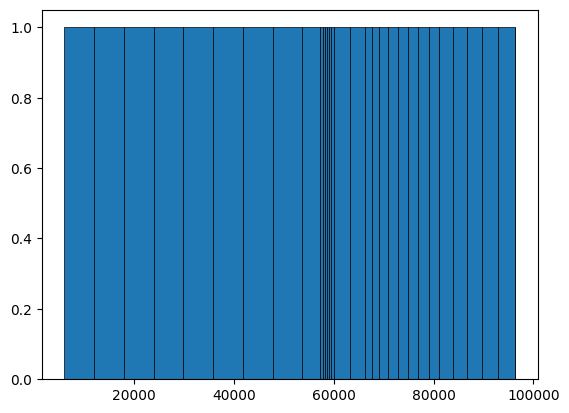

In [2]:
plt.hist(bd1, bins=np.append(bd1, np.max(bd1)+1), edgecolor='black', linewidth=0.5)

In [3]:
# Mode of all possible transients values is 0.0011, implying that this is the brightness of 1 transient (value can be arbitrary)
modes=[]
for arr in transients:
    modes.append(stats.mode(arr))
DEFAULT_VAL=stats.mode(modes)
DEFAULT_VAL

0.0011

([<matplotlib.lines.Line2D at 0x7f865c47e880>],
 array([5967, 5967, 5967, 5967, 5966, 5967, 5967, 5967, 3484,  660,  423,
         365,  366,  426,  670, 3228, 2831, 1442, 1447, 1837, 2040, 2001,
        2023, 2069, 2122, 2659, 2899, 3022, 3218, 3412]),
 [0.0011,
  0.0011,
  0.0011,
  0.0011,
  0.0011001843781428093,
  0.0011,
  0.0011,
  0.0011,
  0.0018839552238805973,
  0.009945,
  0.015517021276595745,
  0.0179827397260274,
  0.017933606557377052,
  0.015407746478873241,
  0.009796567164179105,
  0.002033364312267658,
  0.0023185093606499473,
  0.004551803051317615,
  0.004536074637180373,
  0.0035730538922155693,
  0.0032175000000000003,
  0.003280209895052474,
  0.0032445378151260505,
  0.003172402126631223,
  0.0030931668237511784,
  0.002468484392628808,
  0.002264125560538117,
  0.0021719722038385176,
  0.002039683032939714,
  0.001923710433763189])

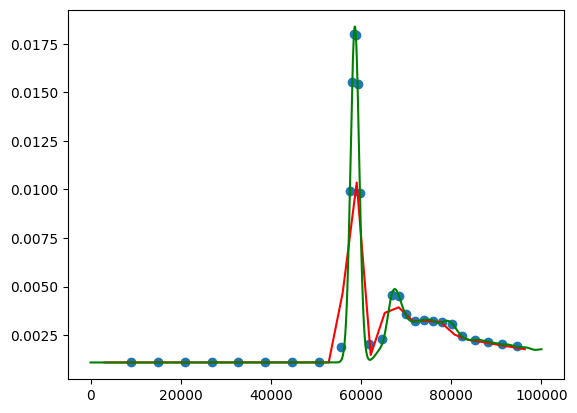

In [36]:
# Generate x-values
diffs = np.diff(bd1)
b_set = bd1[:-1] + (diffs/2)

# Generate y-values
t_set = []
for i in range(len(b_set)):
    cur_diff = (diffs[i] / diffs[0])
    t_set.append(DEFAULT_VAL / cur_diff)

plt.scatter(b_set, t_set)

tr1s = np.array_split(transients[0, :], 31)
for i, arr in enumerate(tr1s):
    tr1s[i] = np.mean(arr)
bds = list(range(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31))[1:]
plt.plot(bds, tr1s, 'r')

plt.plot(transients[0, :], 'g'), diffs, t_set